# Introduction

<div class="alert alert-warning">
<font color=black>

**What?** Chebyshev's Inequality

</font>
</div>

# Import modules

In [5]:
import numpy as np
import random
import statsmodels.api as sm
import matplotlib.pyplot as plt

# What is a Chebyshev's Inequality?

<div class="alert alert-info">
<font color=black>

- Chebyshev’s Inequality aka **Bienayme-Chebyshev** inequality.
- It guarantees that, for a wide class of probability distributions, only a definite fraction of values will be found within a specific distance from the mean of a distribution.
- Chebyshev’s inequality is similar to The Empirical rule (68-95-99.7 -1*sigma, 2*sigma an d3*sigma); however, the latter rule only applies to normal distributions. Chebyshev’s inequality is broader; it can be applied to any distribution so long as the distribution includes a defined variance and mean.
- So Chebyshev’s inequality says that at least (1-1/k^2) of data from a sample must fall within K standard deviations from the mean (or equivalently, no more than 1/k^2 of the distribution’s values can be more than k standard deviations away from the mea

</font>
</div>

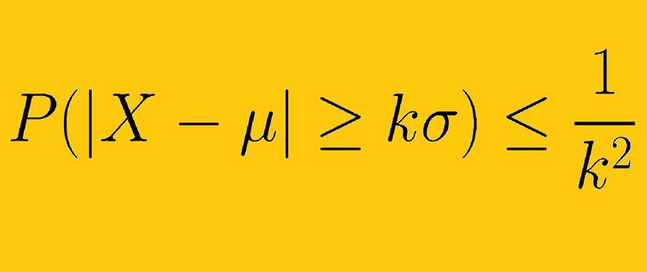

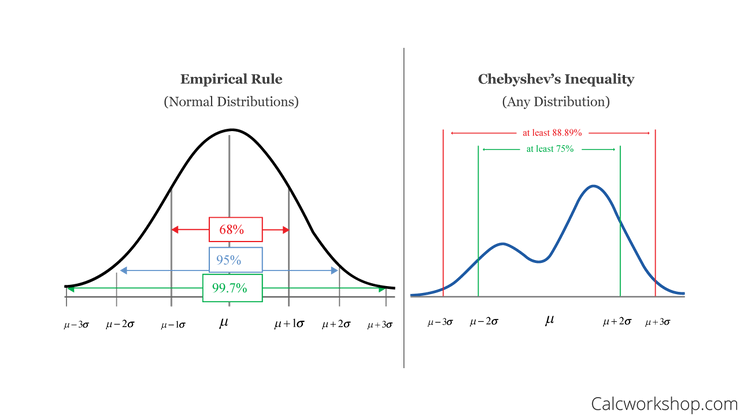

In [6]:
#create a population with a gamma distribution (will work with any other distribution)
shape, scale = 2., 2.  #mean=4, std=2*sqrt(2)
mu = shape*scale #mean and standard deviation
sigma = scale*np.sqrt(shape)

s = np.random.gamma(shape, scale, 1000000)

In [7]:
#sample 10000 values
rs = random.choices(s, k=10000)

<div class="alert alert-info">
<font color=black>

- Count the sample that has a distance from the expected value larger than k standard deviation and use the count to calculate the probabilities. 
- I want to depict a trend of probabilities when k is increasing, so I use a range of k from 0.1 to 3.

</font>
</div>

In [8]:
#set k
ks = [0.1,0.5,1.0,1.5,2.0,2.5,3.0]

#probability list
probs = [] #for each k

for k in ks: 
    #start count
    c = 0
    for i in rs:
        # count if far from mean in k standard deviation
        if abs(i - mu) > k * sigma :
            c += 1
    probs.append(c/10000)

<ipython-input-12-83d6fbd76064>:6: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  plot.show()


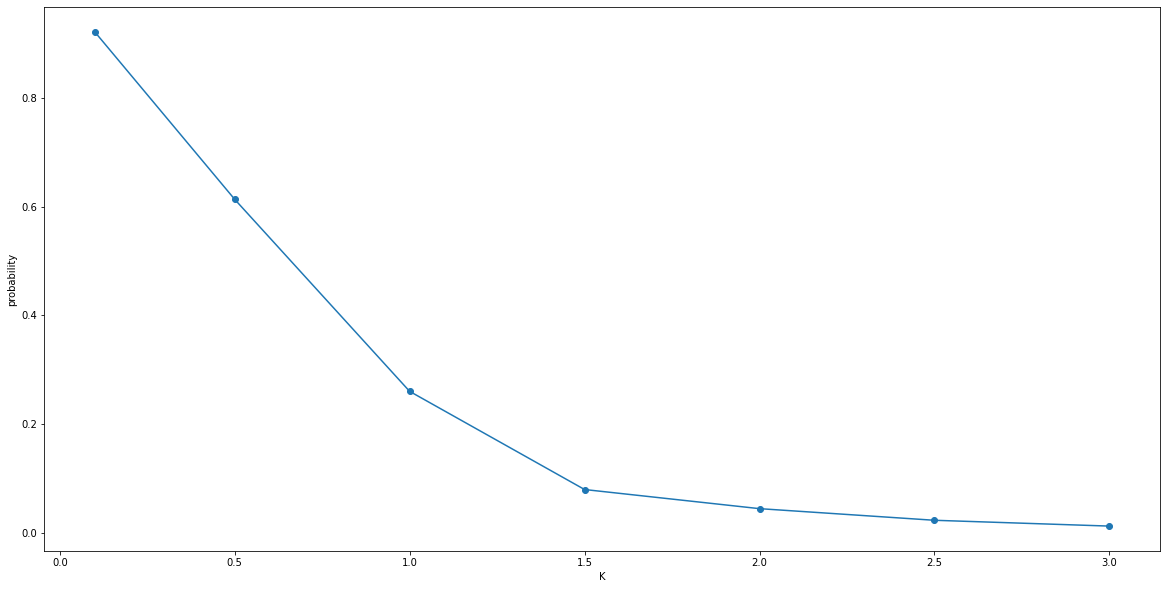

In [12]:
plot = plt.figure(figsize=(20,10))
#plot each probability
plt.xlabel('K')
plt.ylabel('probability')
plt.plot(ks, probs, "o-")
plot.show()


<div class="alert alert-info">
<font color=black>

- From the above plot and result, we can see that as the k increases, the probability is decreasing, and the probability of each k follows the inequality. 
- Moreover, only the case that k is **larger than 1 is useful**. 
- If k is less than 1, the right side of the inequality is larger than 1 which is not useful because the probability cannot be larger than 1. 

</font>
</div>

In [11]:
#print each probability
print("Probability of a sample far from mean more than k standard deviation:")
for i, prob in enumerate(probs):
    print("k:" + str(ks[i]) + ", probability: " \
          + str(prob)[0:5] + \
          " | in theory, probability should less than: " \
          + str(1/ks[i]**2)[0:5])

Probability of a sample far from mean more than k standard deviation:
k:0.1, probability: 0.921 | in theory, probability should less than: 99.99
k:0.5, probability: 0.613 | in theory, probability should less than: 4.0
k:1.0, probability: 0.26 | in theory, probability should less than: 1.0
k:1.5, probability: 0.079 | in theory, probability should less than: 0.444
k:2.0, probability: 0.044 | in theory, probability should less than: 0.25
k:2.5, probability: 0.022 | in theory, probability should less than: 0.16
k:3.0, probability: 0.012 | in theory, probability should less than: 0.111


# References

<div class="alert alert-warning">
<font color=black>

- https://www.kdnuggets.com/2021/09/advanced-statistical-concepts-data-science.html

</font>
</div>